In [1]:
import os
import pdb
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torchvision
from torch import nn
from torchvision import datasets, transforms
import resnet34

from time import time
import multiprocessing as mp

In [6]:
csv_path = 'data/sweep_outputs' #path to data sweep_outputs
csv_list = os.listdir(csv_path)

#csv_list = [csv_list[0], csv_list[2], csv_list[1]]
csv_list = [csv_list[3], csv_list[4], csv_list[5], csv_list[2]]

In [7]:
csv_list

['nozzle_train_synthetic_test_real_1k.csv',
 'nozzle_train_synthetic_test_real_3k.csv',
 'nozzle_train_synthetic_test_real_5k.csv',
 'nozzle_train_synthetic_test_real_10k.csv']

In [128]:
y_label_text = ['Train Real\nTest Real', 'Train Synthetic\nTest Synthetic', 'Train Synthetic\nTest Real']

plot_acc_array = []
plot_model_array = []
plot_label_array = []

for idx in range(3):
    data = pd.read_csv(csv_path + '/' + csv_list[idx])
    print(csv_list[idx])

    for model in data.model_name.unique():
        max_acc_array = []
        for dataset in data.dataset_name.unique():
            max_acc_data = data.max_acc[data.model_name == model][data.dataset_name == dataset]
            val_acc_data = data['val acc'][data.model_name == model][data.dataset_name == dataset]
            max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])
            max_acc_array.append(max_acc)
            plot_acc_array.append(max_acc)
            plot_model_array.append(model)
            plot_label_array.append(y_label_text[idx])
        print(model)
        print(np.max(max_acc_array))



nozzle_train_real_test_real.csv
convnext_small
0.974
vit_b_16
0.951
efficientnetv2_m
0.973
nozzle_train_synthetic_test_synthetic.csv
convnext_small
0.985
efficientnetv2_m
0.98
vit_b_16
0.945
nozzle_train_synthetic_test_real.csv
convnext_small
0.699
vit_b_16
0.74
efficientnetv2_m
0.707


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_20360\1765997024.py:16: RuntimeWarning: All-NaN axis encountered
  max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_20360\1765997024.py:16: RuntimeWarning: All-NaN axis encountered
  max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])


In [22]:
y_label_text = ['1000', '3000', '5000', '10000']

plot_acc_array = []
plot_model_array = []
plot_label_array = []

for idx in range(4):
    data = pd.read_csv(csv_path + '/' + csv_list[idx])
    print(csv_list[idx])

    for model in data.model_name.unique():
        max_acc_array = []
        for dataset in data.dataset_name.unique():
            max_acc_data = data.max_acc[data.model_name == model][data.dataset_name == dataset]
            val_acc_data = data['val acc'][data.model_name == model][data.dataset_name == dataset]
            max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])
            max_acc_array.append(max_acc)
            plot_acc_array.append(max_acc)
            plot_model_array.append(model)
            plot_label_array.append(y_label_text[idx])
        print(model)
        print(np.max(max_acc_array))
        print(np.mean(max_acc_array))



nozzle_train_synthetic_test_real_1k.csv
convnext_small
0.6802
0.6577200000000001
efficientnetv2_m
0.7612
0.6883999999999999
vit_b_16
0.6728
0.56676
nozzle_train_synthetic_test_real_3k.csv
efficientnetv2_m
0.786
0.72724
vit_b_16
0.7626
0.69548
convnext_small
0.7106
0.6978
nozzle_train_synthetic_test_real_5k.csv
efficientnetv2_m
0.789
0.7783200000000001
vit_b_16
0.7818
0.68912
convnext_small
0.7454
0.7010799999999999
nozzle_train_synthetic_test_real_10k.csv
vit_b_16
0.809
0.79268
efficientnetv2_m
0.7994
0.7879599999999999
convnext_small
0.8368
0.75384


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\3798977652.py:16: RuntimeWarning: All-NaN axis encountered
  max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\3798977652.py:16: RuntimeWarning: All-NaN axis encountered
  max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\3798977652.py:16: RuntimeWarning: All-NaN axis encountered
  max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\3798977652.py:16: RuntimeWarning: All-NaN axis encountered
  max_acc = np.nanmax([np.nanmax(max_acc_data), np.nanmax(val_acc_data)])


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\1777888167.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(y_label_text, fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\1777888167.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


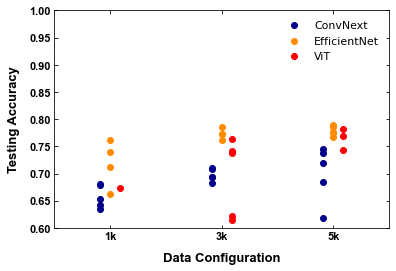

In [10]:
plot_acc_array = np.array(plot_acc_array)
plot_model_array = np.array(plot_model_array)
plot_label_array = np.array(plot_label_array)

from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from matplotlib.category import UnitData
import matplotlib.transforms as transforms

fig1, ax1 = plt.subplots(figsize=(6, 4))

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData


ax1.scatter(plot_label_array[plot_model_array == 'convnext_small'], plot_acc_array[plot_model_array == 'convnext_small'], label='ConvNext', transform=trans + offset(-10), c='darkblue')
ax1.scatter(plot_label_array[plot_model_array == 'efficientnetv2_m'], plot_acc_array[plot_model_array == 'efficientnetv2_m'], label='EfficientNet', c='darkorange')
ax1.scatter(plot_label_array[plot_model_array == 'vit_b_16'], plot_acc_array[plot_model_array == 'vit_b_16'], label='ViT', transform=trans + offset(10), c='red')

ax1.set_xlabel('Data Configuration', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('Testing Accuracy', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
#ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
ax1.legend(loc='upper right', fontsize=11, frameon=False)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
#ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(direction='in', which='both')
ax1.set_xticklabels(y_label_text, fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlim([-.5, 2.5])
ax1.set_ylim([0.6, 1])



fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\2442304973.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(y_label_text, fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_13780\2442304973.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


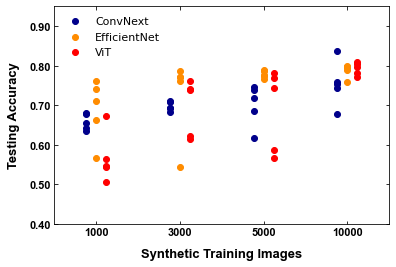

In [21]:
plot_acc_array = np.array(plot_acc_array)
plot_model_array = np.array(plot_model_array)
plot_label_array = np.array(plot_label_array)

from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from matplotlib.category import UnitData
import matplotlib.transforms as transforms

fig1, ax1 = plt.subplots(figsize=(6, 4))

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData


ax1.scatter(plot_label_array[plot_model_array == 'convnext_small'], plot_acc_array[plot_model_array == 'convnext_small'], label='ConvNext', transform=trans + offset(-10), c='darkblue')
ax1.scatter(plot_label_array[plot_model_array == 'efficientnetv2_m'], plot_acc_array[plot_model_array == 'efficientnetv2_m'], label='EfficientNet', c='darkorange')
ax1.scatter(plot_label_array[plot_model_array == 'vit_b_16'], plot_acc_array[plot_model_array == 'vit_b_16'], label='ViT', transform=trans + offset(10), c='red')

ax1.set_xlabel('Synthetic Training Images', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('Testing Accuracy', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
#ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
ax1.legend(loc='upper left', fontsize=11, frameon=False)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
#ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(direction='in', which='both')
ax1.set_xticklabels(y_label_text, fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlim([-.5, 3.5])
ax1.set_ylim([0.4, .95])



fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')